# ID3

Evaluation Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
Confusion Matrix:
[[1 0]
 [0 2]]
Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         1
         Yes       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3


Information Gain for each feature:
Outlook: 0.2467
Temperature: 0.0292
Humidity: 0.1518
Windy: 0.0481

Testing Data with Actual and Predicted Labels:
    Outlook  Temperature  Humidity  Windy Actual Predicted
9         1            2         1      0    Yes       Yes
11        0            2         0      1    Yes       Yes
0         2            1         0      0     No        No

New instance (raw values): {'Outlook': 'Sunny', 'Temperature': 'Cool', 'Humidity': 'Normal', 'Windy': 'True'}

Encoded new instance: 
   Outlo

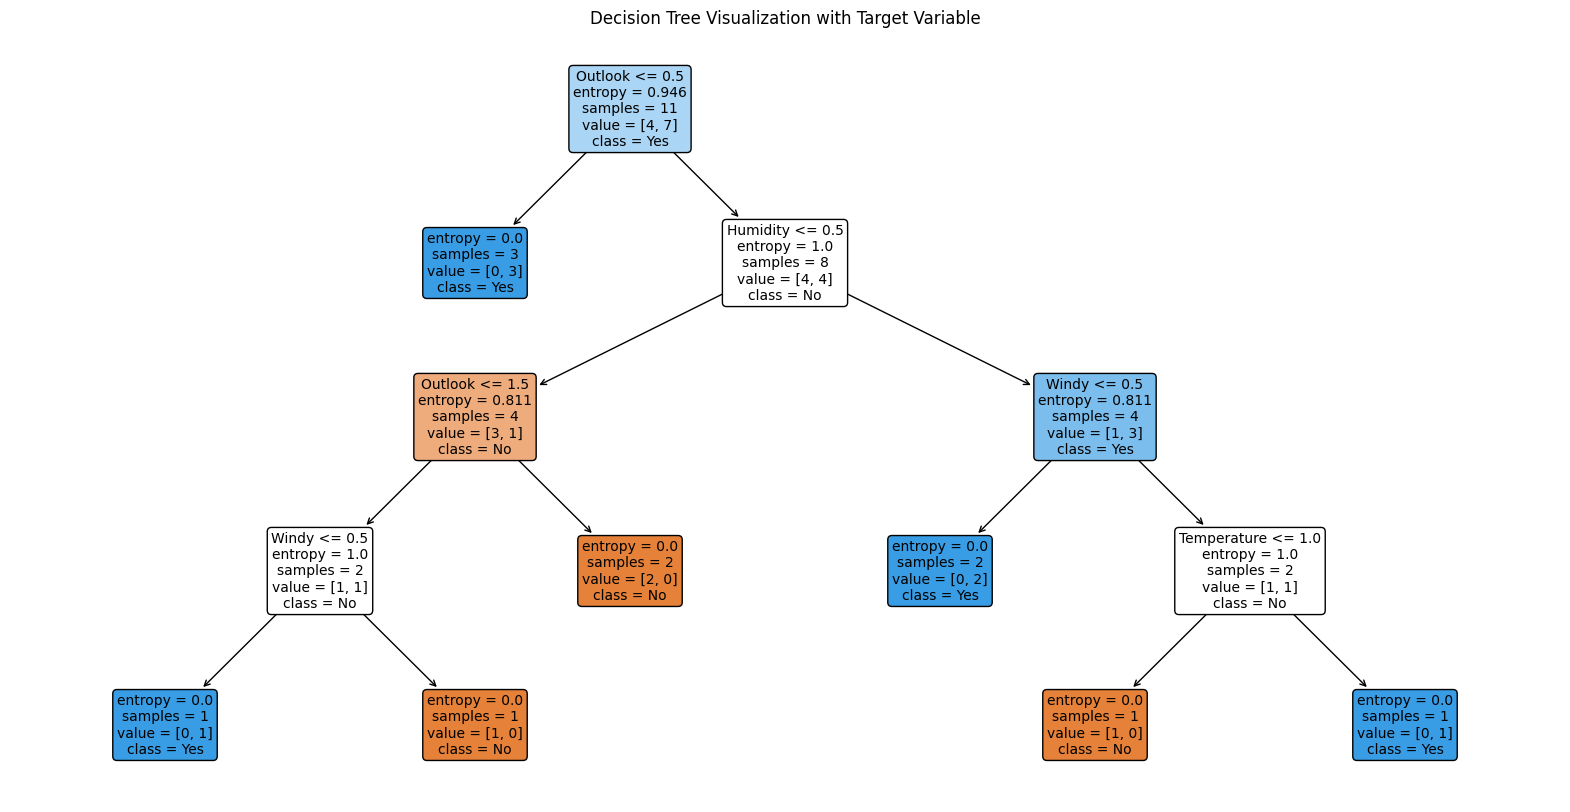

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Sample dataset
data = pd.DataFrame({
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': ['False', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'False', 'False', 'True', 'True', 'False', 'True'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
})

# Encode categorical variables as numeric
label_encoders = {}
for column in data.columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

# Features and target variable
X = data[['Outlook', 'Temperature', 'Humidity', 'Windy']]
y = data['PlayTennis']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train decision tree classifier with entropy (ID3-like)
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary', pos_label=label_encoders['PlayTennis'].transform(['Yes'])[0])
recall = recall_score(y_test, y_pred, average='binary', pos_label=label_encoders['PlayTennis'].transform(['Yes'])[0])
f1 = f1_score(y_test, y_pred, average='binary', pos_label=label_encoders['PlayTennis'].transform(['Yes'])[0])
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoders['PlayTennis'].classes_)

# Display metrics
print("Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Calculate and display information gain for each feature
def entropy(data):
    labels = data.value_counts()
    probabilities = labels / len(data)
    return -sum(probabilities * np.log2(probabilities))

def information_gain(data, feature, target):
    total_entropy = entropy(data[target])
    values = data[feature].value_counts()
    weighted_entropy = sum((values[val] / len(data)) * entropy(data[data[feature] == val][target])
                           for val in values.index)
    return total_entropy - weighted_entropy

features = ['Outlook', 'Temperature', 'Humidity', 'Windy']
print("\nInformation Gain for each feature:")
for feature in features:
    ig = information_gain(data, feature, 'PlayTennis')
    print(f'{feature}: {ig:.4f}')

# Display testing data with actual vs. predicted labels
test_results = X_test.copy()
test_results['Actual'] = label_encoders['PlayTennis'].inverse_transform(y_test)
test_results['Predicted'] = label_encoders['PlayTennis'].inverse_transform(y_pred)
print("\nTesting Data with Actual and Predicted Labels:")
print(test_results)

# Define a new instance with raw categorical values
new_instance_raw = {
    'Outlook': 'Sunny',
    'Temperature': 'Cool',
    'Humidity': 'Normal',
    'Windy': 'True'
}

# Print the raw new instance
print(f'\nNew instance (raw values): {new_instance_raw}')

# Encode the new instance using label encoders
new_instance_encoded = pd.DataFrame({
    'Outlook': [label_encoders['Outlook'].transform([new_instance_raw['Outlook']])[0]],
    'Temperature': [label_encoders['Temperature'].transform([new_instance_raw['Temperature']])[0]],
    'Humidity': [label_encoders['Humidity'].transform([new_instance_raw['Humidity']])[0]],
    'Windy': [label_encoders['Windy'].transform([new_instance_raw['Windy']])[0]]
})

# Make a prediction for the new instance
new_prediction = clf.predict(new_instance_encoded)
predicted_class = label_encoders['PlayTennis'].inverse_transform(new_prediction)

# Print the encoded new instance and its prediction
print(f'\nEncoded new instance: \n{new_instance_encoded}')
print(f'New instance prediction: {predicted_class[0]}')

# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=label_encoders['PlayTennis'].classes_, filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree Visualization with Target Variable')
plt.show()


Summary of the Decision Tree Classification Program with ID3, Entropy, and Information Gain
**What We Did:**

We built a decision tree model to predict whether someone will play tennis based on weather conditions.
Key Concepts:

**1.ID3 Algorithm:** This algorithm is used to build the decision tree. It uses a method called entropy and information gain to decide which feature (like Outlook, Temperature) to split on at each step of the tree.

**2.Entropy:**

Entropy is a measure of uncertainty or disorder. In the context of our decision tree, it measures how mixed the classes (Yes/No) are in the data. Lower entropy means less uncertainty and more homogeneity (all Yes or all No).

**3.Information Gain:**

Information Gain helps to decide which feature to split on by measuring how much a feature reduces uncertainty. It calculates the difference between the entropy before and after the split. A higher information gain means a feature is more useful for making a decision.

**4.Preparing the Data:**

We converted text data into numbers using Label Encoding so that the machine learning model could process it.

**5.Training the Model:**

We used the Decision Tree Classifier with the ID3 algorithm. This means the model was built by choosing splits based on the information gain, which in turn is based on entropy calculations.

**6.Evaluating the Model:**

We tested the model using a portion of the data (20%) that was not used for training.

We calculated several metrics:

**Accuracy:** How often the model’s predictions were correct.
**Precision, Recall, F1 Score:** Detailed performance metrics for each class.

**Confusion Matrix: **Shows the actual versus predicted outcomes.

**Classification Report:** Provides precision, recall, F1 scores, and support for each class.
Information Gain Calculation:

We calculated the information gain for each feature to understand how well each feature helps in making a decision. This helps us see which features (like Outlook or Humidity) are most influential in predicting whether to play tennis.

**Prediction for a New Instance:**

We defined a new set of conditions (e.g., Outlook = Sunny, Temperature = Cool) and encoded these conditions into numbers.

We used the trained model to predict whether the person will play tennis based on these encoded values.

**Visualizing the Model:**

We created a Decision Tree Visualization to see how the model makes decisions based on the features. This visual helps us understand which features are most important in the decision-making process.

**Example:**

Imagine a decision tree that helps you decide whether to play tennis based on the weather. The tree is built using the ID3 algorithm, which uses entropy to measure uncertainty and information gain to find the best features to split on. If the tree shows that "Outlook" is a crucial feature, it means that the value of "Outlook" (Sunny, Overcast, Rainy) significantly reduces uncertainty about whether to play tennis.

In summary, the program uses the ID3 algorithm with entropy and information gain to build a decision tree that predicts whether to play tennis. It evaluates the model’s performance, makes predictions for new data, and visualizes how decisions are made based on the features.